In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Definition of some graphs

In [2]:
%%writefile line.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
8 [style=filled];
9 [style=filled];
10 [style=filled];
11 [style=filled];
12 [style=filled];
13 [style=filled];
14 [style=filled];
15 [style=filled];
16 [style=filled];
17 [style=filled];
18 [style=filled];
19 [style=filled];
20 [style=filled];
21 [style=filled];
22 [style=filled];
23 [style=filled];
0--1--2--3--4--5--6--7--8--9--10--11--12--13--14--15--16--17--18--19--20--21--22--23;
}

Writing line.dot


In [3]:
%%writefile twoD.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
8 [style=filled];
9 [style=filled];
10 [style=filled];
11 [style=filled];
12 [style=filled];
13 [style=filled];
14 [style=filled];
15 [style=filled];


0--1--2--3;
4--5--6--7;
8--9--10--11;
12--13--14--15;
0--4--8--12;
1--5--9--13;
2--6--10--14;
3--7--11--15;
}

Writing twoD.dot


### Read and display a graph

In [4]:
import pydot
filenames=['circle', 'line', 'star', 'torus', 'twoD', 'twoblobs']
filename='twoD'
def read_graph(filename):
    dot=open(filename+'.dot','r').readlines()
    dot=''.join(dot)

    G,=pydot.dot_parser.parse_dot_data(dot)
    gif_name=filename+'.gif'
    G.write_gif(gif_name)
    return G,gif_name


### Compute graph matrices
* A: Adjacency matrix
* D: Degree Matrix

In [5]:
from numpy.linalg import eigh
from numpy import matrix

def calc_laplacian(G):
    node_n=len(G.get_nodes())
    A=matrix(np.zeros([node_n,node_n])) # adjacency matrix
    for edge in G.get_edge_list():
        _i=int(edge.get_source())
        _j=int(edge.get_destination())
        A[_i,_j]=1
        A[_j,_i]=1

    D=matrix(np.zeros([node_n,node_n])) # degree matrix 
    for i in range(node_n):
        D[i,i]=sum(A[i,:])
    L=D-A  # the laplacian

    w,v=eigh(L) # perform eigen-decomposition of a symmetric (Hermitian) matrix
    return w,v,A,D

### Find eigen-decomposition of laplacian

In [6]:
_range=[0.,100.]
_offset=_range[0]
_scale=_range[1]-_range[0]
_min=-1.;_max=1.;

def vec2color(vec):
    return['grey'+str(int(_offset+_scale*(x-_min)/(_max-_min))) for x in vec]

def graph_eig(G,v,filename):
    node_n=shape(v)[0]
    for j in range(min(10,node_n)):
        colors=vec2color(v[:,j])
        #print j,colors
        for node in G.get_node_list():
            i=int(node.get_name())
            node.set_color(colors[i])
        G.write_gif("%s.%d.gif"%(filename,j))

In [7]:
def print_eig(w,v):
    for i in range(node_n):
        print(str(i),'eigval:%5.2f'%w[i], end=' ')
        print('eigvec:',', '.join(['%5.1f'%x for x in v[:,i]]))

In [8]:
def process_graph(filename):
    G,gif_name=read_graph(filename)
    w,v,A,D=calc_laplacian(G)
    graph_eig(G,v,filename)
    all_gifs=filename+"*.gif"
    #!open $all_gifs
    return w,v,A,D,G

### The circle graph
Is a simple graph where each node has two neighbors

In [9]:
w,v,A,D,G=process_graph('circle')

FileNotFoundError: [Errno 2] No such file or directory: 'circle.dot'

eigenvals= [2.77555756e-16 5.85786438e-01 5.85786438e-01 2.00000000e+00]


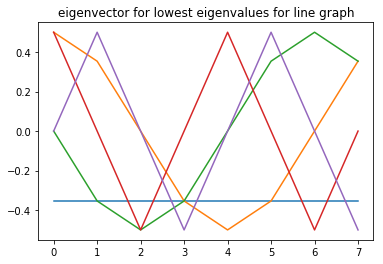

In [26]:
print('eigenvals=',w[:4])
plot(v[:,:5]);
title('eigenvector for lowest eigenvalues for line graph');

In [29]:
L=D-A
print(L)

[[ 2. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  2.]]


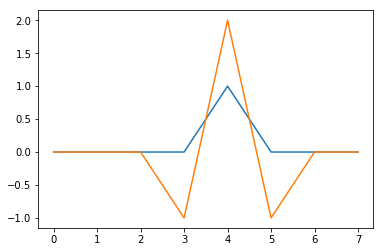

In [45]:
delta=np.zeros(8)
delta[4]=1
plot(delta)
X=np.array(delta*L)
plot(X[0,:])

### The line graph
Is a simple graph where each node has two neighbors other then the two endpoints that have just one neighbor.

In [10]:
w,v,A,D,G=process_graph('line')

In [13]:
L=np.array(D-A)
L[:5,:5]

array([[ 1., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

eigenvals= [-1.90991132e-16  1.71102773e-02  6.81483474e-02  1.52240935e-01]


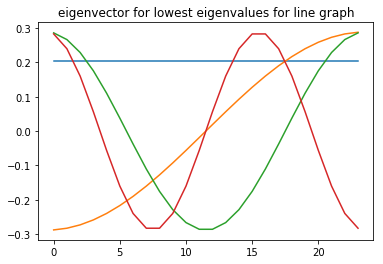

In [17]:
print('eigenvals=',w[:4])
plot(v[:,:4]);
title('eigenvector for lowest eigenvalues for line graph');

The first eigen vector is a constant that has an eigen-value of zero. The second one is the  most useful for us: it gives us a parameterization from -0.3 to +0.3 along the line.

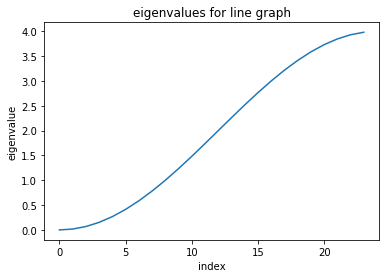

In [18]:
plot(w)
xlabel('index')
ylabel('eigenvalue')
title('eigenvalues for line graph');

### A 2D graph

In [24]:
w,v,A,D,G=process_graph('twoD')
print(w[:6])
!open twoD.[012].gif       



[-6.47714478e-16  5.85786438e-01  5.85786438e-01  1.17157288e+00
  2.00000000e+00  2.00000000e+00]


Consider the three eigen-vectors with the smallest eigenvalues.

* Eigenvector 0: The uniform vector is always an eigenvector with eigen-value 0.
* Eigenvectors 1 and 2: these are, for us, the most meaningful eigenvectors. They have the smallest eigen-value that is not zero (0.59) which means that they are the slowest to decay. As we see, these eigenvectors capture the 2D structure of the graph. Specifically, eigen-vector 1 assigns to each vertex a value proportional to the distance from vertex 15. While eigen-vector 2 assigns it the distance from vertex 3. It is not hard to see that these two values form a 2D coordinate system for the 2D graph.
![pic](images/EigenVectors/twoD.1.jpg)

Higher order eigen-vectors have larger eigen-values and corresponds to patterns that vary more rapidly across the graph.

![pic](images/EigenVectors/twoD.2.jpg)

### random walk
The heat dispersion process is intimately related to another physical process: the random walk.

The **Lazy random walk** process can be described as follows: A pebble is placed on one of the nodes of the graph, the the following process ensues. First, with probabities 1/2,1/2 a choice is made whether to *stay put* or to *move* to one of the neighboring nodes. If the choice is to move, the specific neighbor is chosen at random with equal probability for all of the neighbors.

Now imagine that there is a huge number of pebbles and that they are all performing random walk at the same time. We can think about the fraction of pebbles on each node as a probability distribution and ask how this distribution evolved over time.

Denote by $p_i^t$ the fraction of the pebbles that is on node $i$ at time $t$. Then the update rule for the probabilities is:
$$
p_i^{t+1} = \frac{1}{2}\left( p_i^t +  \sum_{j \in N(i)} \frac{p_j^t}{d_j} \right)
$$

We can re-write this in matrix form:
$$
p^{t+1} = \frac{1}{2} \left(I + A D^{-1} \right) p^t
$$

In [17]:
filename='star'
w,v,A,D,G=process_graph(filename)
node_n = shape(A)[0]
DI = matrix(np.zeros([node_n,node_n])) # Inverse of degree matrix 
for i in range(node_n):
    DI[i,i]=1./D[i,i]
W=0.5*(eye(node_n)+A*DI)

In [18]:
ww,vv=eig(W)
print_eig(ww,vv)

0 eigval: 1.00 eigvec:   0.9,   0.1,   0.1,   0.1,   0.1,   0.1,   0.1,   0.1
1 eigval: 0.00 eigvec:   0.9,  -0.1,  -0.1,  -0.1,  -0.1,  -0.1,  -0.1,  -0.1
2 eigval: 0.50 eigvec:   0.0,  -0.4,   0.9,  -0.1,  -0.1,  -0.1,  -0.1,  -0.1
3 eigval: 0.50 eigvec:  -0.0,   0.5,   0.2,   0.5,  -0.3,  -0.3,  -0.3,  -0.3
4 eigval: 0.50 eigvec:   0.0,  -0.7,  -0.2,   0.6,   0.1,   0.1,   0.1,   0.1
5 eigval: 0.50 eigvec:   0.0,   0.0,  -0.0,  -0.0,  -0.5,   0.5,   0.5,  -0.5
6 eigval: 0.50 eigvec:  -0.0,  -0.0,  -0.0,  -0.0,   0.5,   0.5,  -0.6,  -0.4
7 eigval: 0.50 eigvec:   0.0,  -0.0,  -0.0,  -0.0,  -0.8,   0.6,  -0.1,   0.3


In [19]:
graph_eig(G,vv,filename+'.RW')
fname=filename+'*.gif'
!open $fname